<a href="https://colab.research.google.com/github/pedro-pauletti/deeplearning-pytorch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

### Making Predictions

In [3]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [4]:
def forward(x):
  y = w*x + b
  return y

In [5]:
#Making predictions
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [6]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

### Linear Class

Standardized way of constructing a linear model

In [7]:
from torch.nn import Linear

In [8]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [9]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


### Creating Dataset and Custom Models

Text(0.5, 0, 'x')

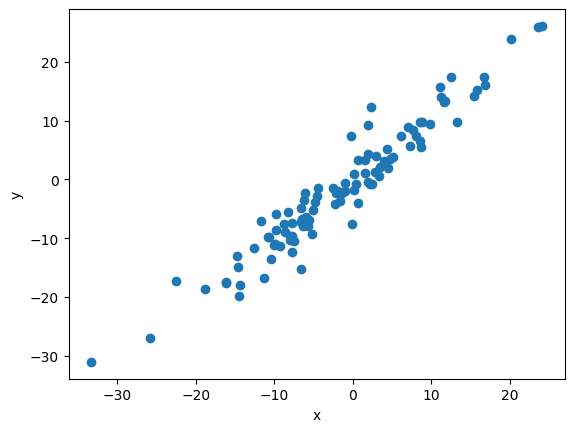

In [10]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [11]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [12]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [13]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [14]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

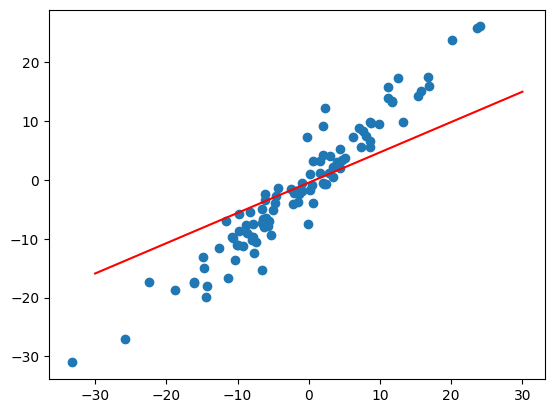

In [15]:
plot_fit('Initial Model')

### Loss Function, Gradient Descent and Mean Squared Error (MSE)

In [27]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [29]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 8.389264106750488
epoch: 1 loss: 8.389263153076172
epoch: 2 loss: 8.389260292053223
epoch: 3 loss: 8.389257431030273
epoch: 4 loss: 8.38925552368164
epoch: 5 loss: 8.389252662658691
epoch: 6 loss: 8.389251708984375
epoch: 7 loss: 8.38924789428711
epoch: 8 loss: 8.389245986938477
epoch: 9 loss: 8.389244079589844
epoch: 10 loss: 8.389242172241211
epoch: 11 loss: 8.389240264892578
epoch: 12 loss: 8.389237403869629
epoch: 13 loss: 8.389235496520996
epoch: 14 loss: 8.389233589172363
epoch: 15 loss: 8.38923168182373
epoch: 16 loss: 8.389228820800781
epoch: 17 loss: 8.389228820800781
epoch: 18 loss: 8.389225006103516
epoch: 19 loss: 8.3892240524292
epoch: 20 loss: 8.389220237731934
epoch: 21 loss: 8.3892183303833
epoch: 22 loss: 8.389216423034668
epoch: 23 loss: 8.389214515686035
epoch: 24 loss: 8.389212608337402
epoch: 25 loss: 8.38921070098877
epoch: 26 loss: 8.389208793640137
epoch: 27 loss: 8.389206886291504
epoch: 28 loss: 8.389204978942871
epoch: 29 loss: 8.38920211791992

Text(0.5, 0, 'epoch')

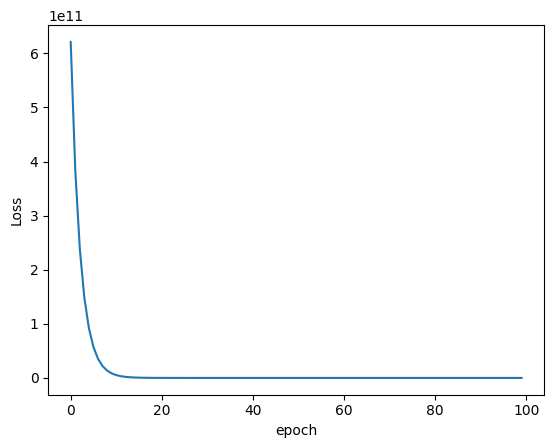

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

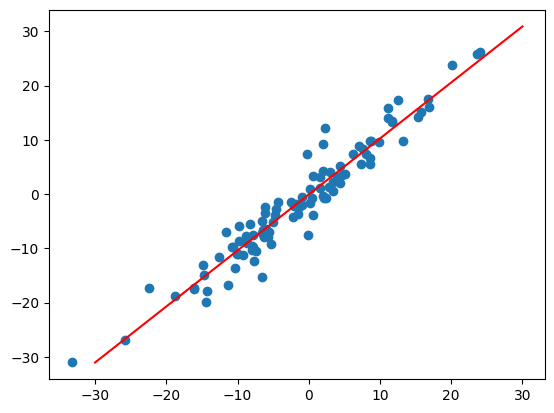

In [23]:
plot_fit("Trained Model")